In [22]:
import cv2 as cv
import numpy as np
from skimage.metrics import structural_similarity as ssim
import time
import matplotlib.pyplot as plt

In [3]:
img1 = cv.imread('/content/MRI.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/BLUR.jpg',cv.IMREAD_GRAYSCALE)
img3 = cv.imread('/content/MESSI.jpg',cv.IMREAD_GRAYSCALE)

In [36]:
def display(before,after,title):
  fig,axes = plt.subplots(1,2,figsize = (12,6))
  axes[0].imshow(before,cmap='gray')
  axes[0].set_title('ORIGINA; IMAGE')
  axes[0].axis('off')

  axes[1].imshow(after,cmap='gray')
  axes[1].set_title(title)
  axes[1].axis('off')

#SOBEL FILTER (Edge Detection)

In [19]:
def sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(sobel_x, sobel_y)

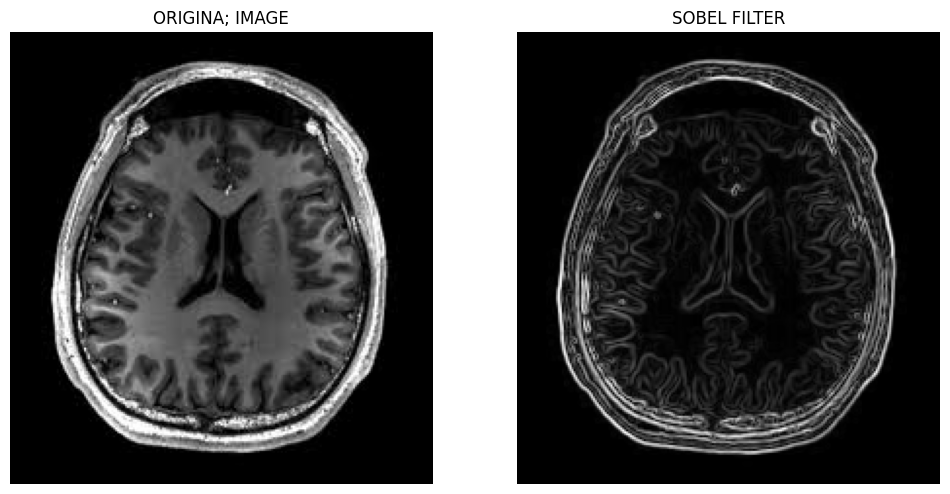

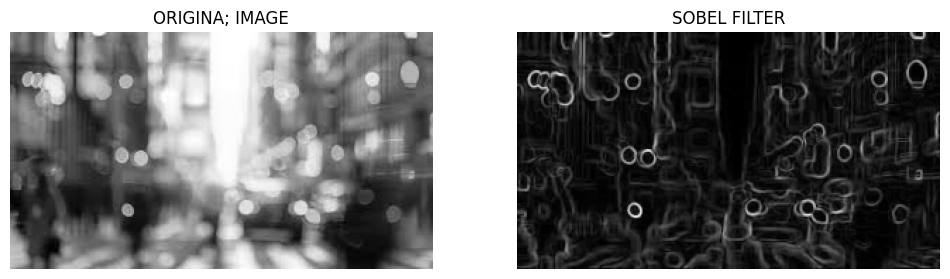

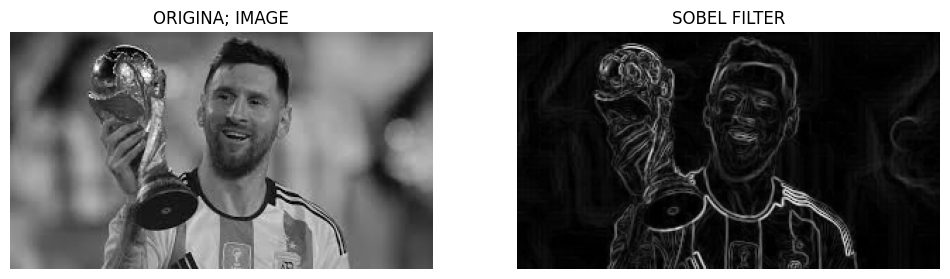

In [37]:
sobel_1 = sobel(img1)
sobel_2 = sobel(img2)
sobel_3 = sobel(img3)
display(img1,sobel_1,'SOBEL FILTER')
display(img2,sobel_2,'SOBEL FILTER')
display(img3,sobel_3,'SOBEL FILTER')

#GABOR FILTER (Texture Extraction)

In [18]:
def gabor(image):
    kernel = cv2.getGaborKernel(ksize=(21, 21), sigma=5.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)
    return cv2.filter2D(image, cv2.CV_64F, kernel)

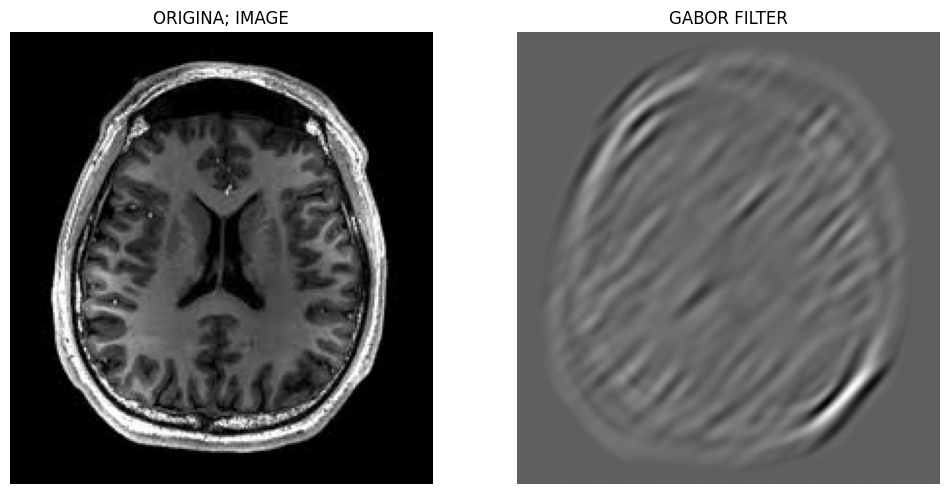

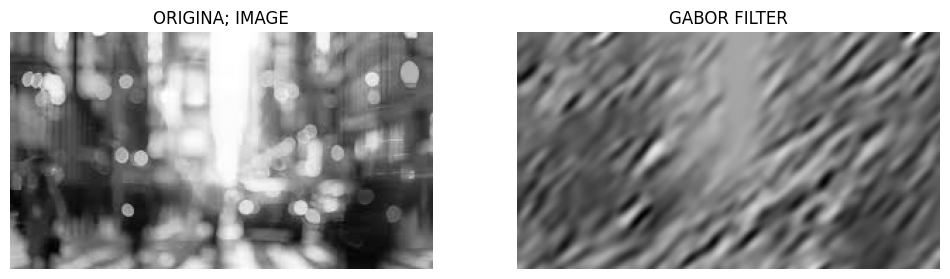

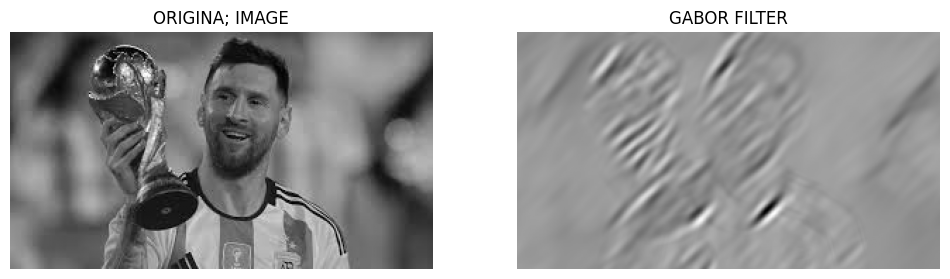

In [39]:
gaber_1 = gabor(img1)
gaber_2 = gabor(img2)
gaber_3 = gabor(img3)
display(img1,gaber_1,'GABOR FILTER')
display(img2,gaber_2,'GABOR FILTER')
display(img3,gaber_3,'GABOR FILTER')

#GAUSSIAN FILTER (Noise Reduction)

In [17]:
def gaussian(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

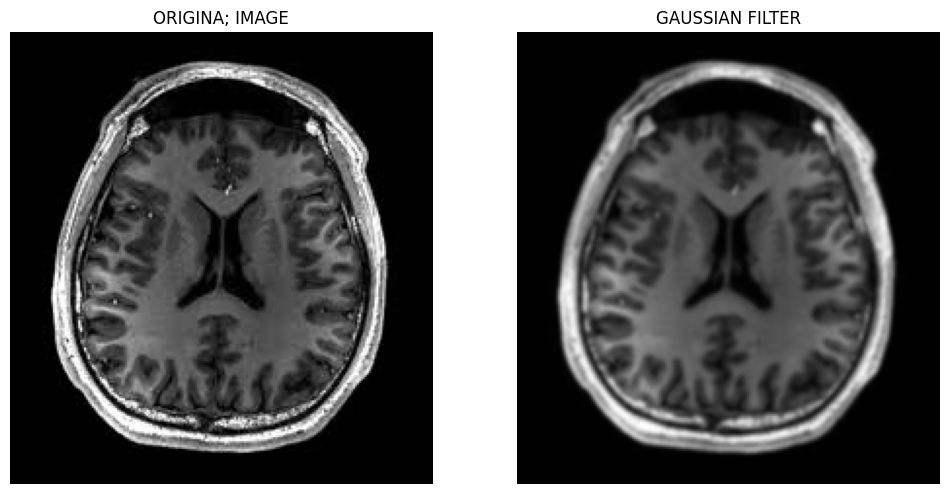

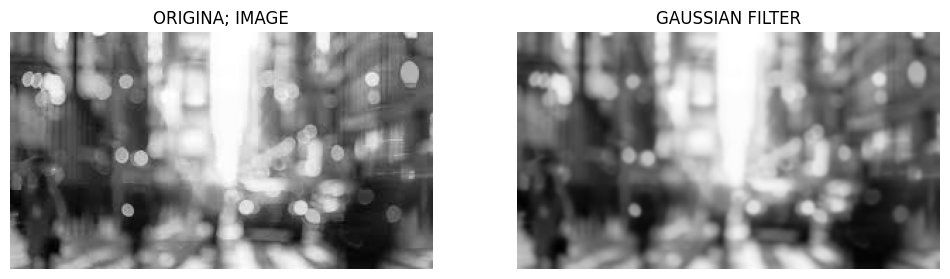

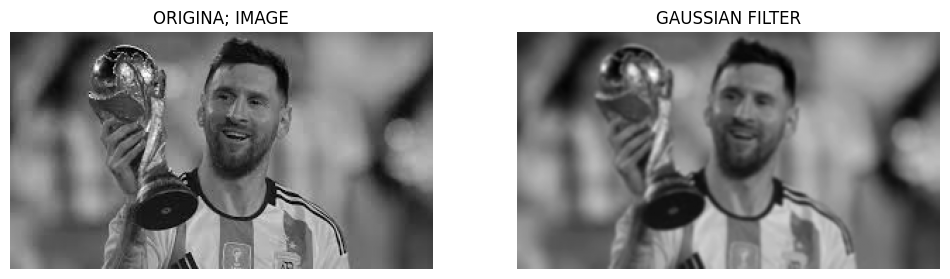

In [40]:
gaussian_1 = gaussian(img1)
gaussian_2 = gaussian(img2)
gaussian_3 = gaussian(img3)
display(img1,gaussian_1,'GAUSSIAN FILTER')
display(img2,gaussian_2,'GAUSSIAN FILTER')
display(img3,gaussian_3,'GAUSSIAN FILTER')

#EVALUATION METRICS

Signal-To-Noise Ratio (SNR)

In [20]:
def snr(original,filtered):
  noise = original - filtered
  signal_power = nm.var(original)
  noise_power = np.var(noise)
  snr = 10 * np.log10(signal_power / noise_power)
  return snr

Structural Similarity Index

In [ ]:
def ssim(original.filtered):
  return ssim(original,filtered)

Execution Time

In [23]:
def execution_time(func,image):
  start_time = time.time()
  result = func(image)
  end_time = time.time()
  execution = end_time-start_time
  return execution

#RESULTS

In [42]:
import cv2 as cv
import numpy as np
from skimage.metrics import structural_similarity as ssim
import time
import matplotlib.pyplot as plt

# Load images
img1 = cv.imread('/content/MRI.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/BLUR.jpg', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('/content/MESSI.jpg', cv.IMREAD_GRAYSCALE)

# Apply Sobel Filter (Edge Detection)
def apply_sobel(image):
    sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    return cv.magnitude(sobel_x, sobel_y)

# Apply Gabor Filter (Texture Extraction)
def apply_gabor(image):
    kernel = cv.getGaborKernel(ksize=(21, 21), sigma=5.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)
    return cv.filter2D(image, cv.CV_64F, kernel)

# Apply Gaussian Filter (Noise Reduction)
def apply_gaussian(image):
    return cv.GaussianBlur(image, (5, 5), 0)

# Calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(original, filtered):
    noise = original - filtered
    signal_power = np.var(original)
    noise_power = np.var(noise)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SSIM
def calculate_ssim(original, filtered):
    # Normalize images to [0, 1]
    original = original / 255.0
    filtered = filtered / 255.0

    # Specify the data_range for SSIM
    return ssim(original, filtered, data_range=1.0)

# Measure execution time
def measure_execution_time(func, image):
    start_time = time.time()
    result = func(image)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# Apply filters and evaluate metrics for each image
images = [img1, img2, img3]
image_names = ['img1', 'img2', 'img3']

# To store results
results = []

for i, image in enumerate(images):
    # Apply filters
    sobel_filtered, sobel_time = measure_execution_time(apply_sobel, image)
    gabor_filtered, gabor_time = measure_execution_time(apply_gabor, image)
    gaussian_filtered, gaussian_time = measure_execution_time(apply_gaussian, image)

    # Calculate metrics
    sobel_snr = calculate_snr(image, sobel_filtered)
    gabor_snr = calculate_snr(image, gabor_filtered)
    gaussian_snr = calculate_snr(image, gaussian_filtered)

    sobel_ssim = calculate_ssim(image, sobel_filtered)
    gabor_ssim = calculate_ssim(image, gabor_filtered)
    gaussian_ssim = calculate_ssim(image, gaussian_filtered)

    # Store results for each image
    results.append({
        'image_name': image_names[i],
        'sobel_snr': sobel_snr, 'gabor_snr': gabor_snr, 'gaussian_snr': gaussian_snr,
        'sobel_ssim': sobel_ssim, 'gabor_ssim': gabor_ssim, 'gaussian_ssim': gaussian_ssim,
        'sobel_time': sobel_time, 'gabor_time': gabor_time, 'gaussian_time': gaussian_time
    })

# Display Results: Combined Table with SNR, SSIM, and Execution Time
print("\nCombined Results:")
print("{:<10} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
    "Image", "Sobel SNR", "Gabor SNR", "Gaussian SNR", "Sobel SSIM", "Gabor SSIM", "Gaussian SSIM", "Sobel Time", "Gabor Time", "Gaussian Time"))

for res in results:
    print("{:<10} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
        res['image_name'],
        round(res['sobel_snr'], 2),
        round(res['gabor_snr'], 2),
        round(res['gaussian_snr'], 2),
        round(res['sobel_ssim'], 2),
        round(res['gabor_ssim'], 2),
        round(res['gaussian_ssim'], 2),
        round(res['sobel_time'], 4),
        round(res['gabor_time'], 4),
        round(res['gaussian_time'], 4)))



Combined Results:
Image      Sobel SNR       Gabor SNR       Gaussian SNR    Sobel SSIM      Gabor SSIM      Gaussian SSIM   Sobel Time      Gabor Time      Gaussian Time  
img1       -6.83           -22.9           -5.14           0.32            0.19            0.91            0.0007          0.0015          0.0002         
img2       -2.72           -19.9           -5.3            0.07            0.01            0.96            0.0005          0.0018          0.0002         
img3       -7.64           -22.53          -8.41           0.07            0.01            0.91            0.0007          0.0025          0.0001         


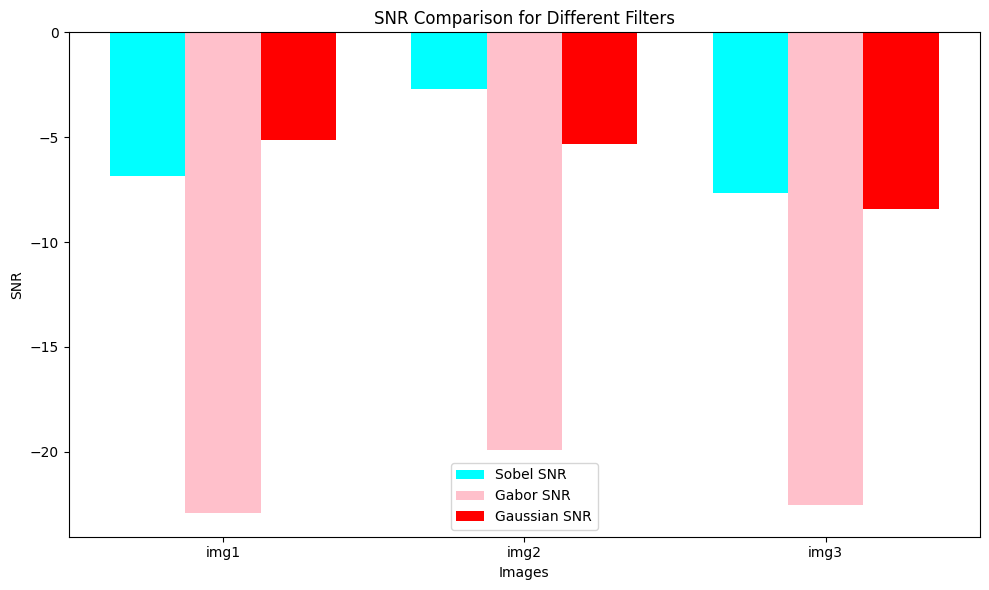

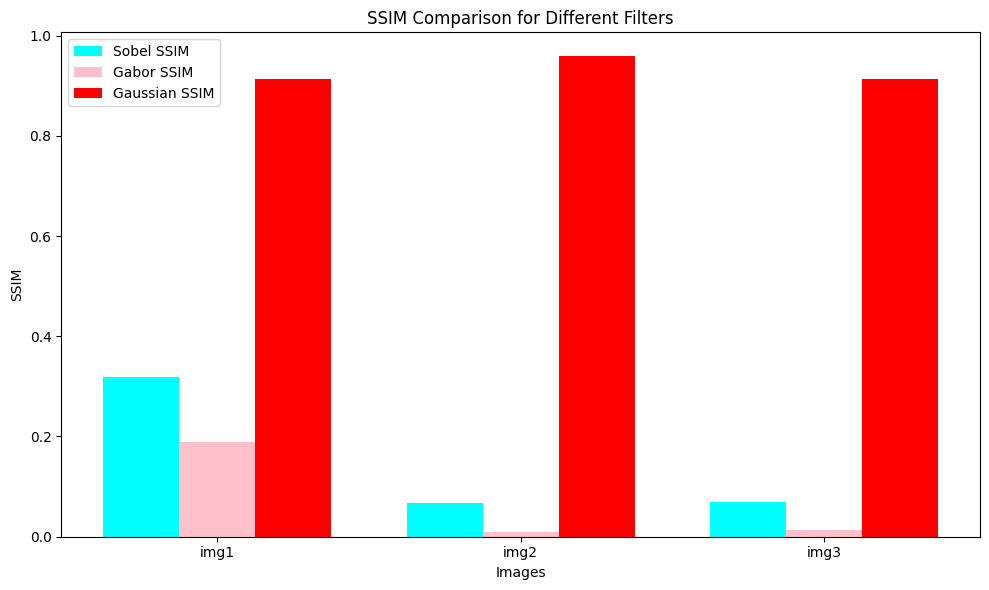

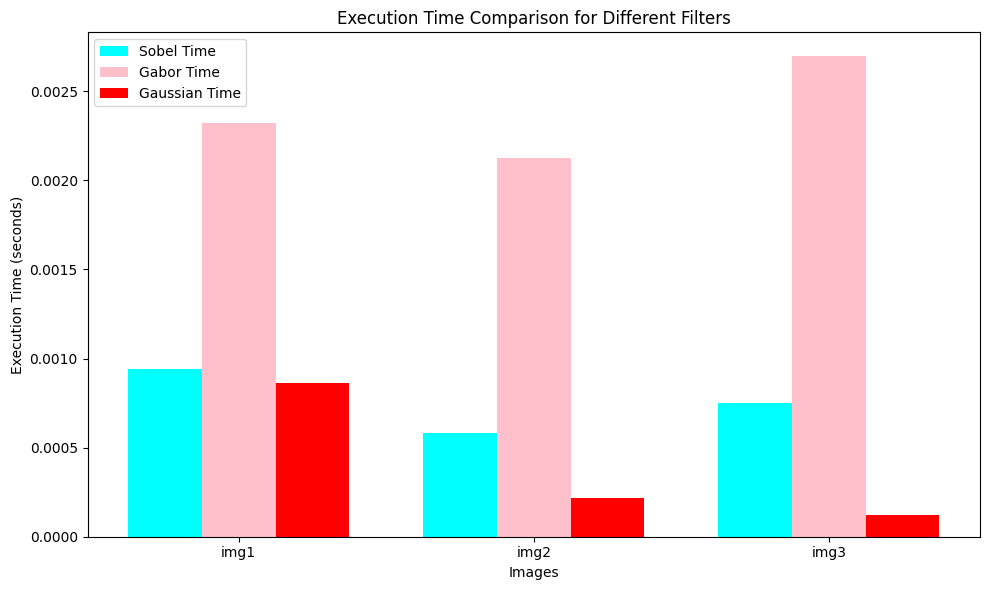

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Extract results for plotting
image_names = [res['image_name'] for res in results]
sobel_snr = [res['sobel_snr'] for res in results]
gabor_snr = [res['gabor_snr'] for res in results]
gaussian_snr = [res['gaussian_snr'] for res in results]

sobel_ssim = [res['sobel_ssim'] for res in results]
gabor_ssim = [res['gabor_ssim'] for res in results]
gaussian_ssim = [res['gaussian_ssim'] for res in results]

sobel_time = [res['sobel_time'] for res in results]
gabor_time = [res['gabor_time'] for res in results]
gaussian_time = [res['gaussian_time'] for res in results]

# 1. Bar Plot for SNR comparison
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(image_names))

# Using cyan, pink, and red for colors
plt.bar(index, sobel_snr, bar_width, label='Sobel SNR', color='cyan')  # Cyan
plt.bar(index + bar_width, gabor_snr, bar_width, label='Gabor SNR', color='pink')  # Pink
plt.bar(index + 2 * bar_width, gaussian_snr, bar_width, label='Gaussian SNR', color='red')  # Red

plt.xlabel('Images')
plt.ylabel('SNR')
plt.title('SNR Comparison for Different Filters')
plt.xticks(index + bar_width, image_names)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar Plot for SSIM comparison
plt.figure(figsize=(10, 6))
plt.bar(index, sobel_ssim, bar_width, label='Sobel SSIM', color='cyan')  # Cyan
plt.bar(index + bar_width, gabor_ssim, bar_width, label='Gabor SSIM', color='pink')  # Pink
plt.bar(index + 2 * bar_width, gaussian_ssim, bar_width, label='Gaussian SSIM', color='red')  # Red

plt.xlabel('Images')
plt.ylabel('SSIM')
plt.title('SSIM Comparison for Different Filters')
plt.xticks(index + bar_width, image_names)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Bar Plot for Execution Time comparison
plt.figure(figsize=(10, 6))
plt.bar(index, sobel_time, bar_width, label='Sobel Time', color='cyan')  # Cyan
plt.bar(index + bar_width, gabor_time, bar_width, label='Gabor Time', color='pink')  # Pink
plt.bar(index + 2 * bar_width, gaussian_time, bar_width, label='Gaussian Time', color='red')  # Red

plt.xlabel('Images')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison for Different Filters')
plt.xticks(index + bar_width, image_names)
plt.legend()
plt.tight_layout()
plt.show()


#CONCLUSION
In this experiment, three images were processed using three different filters: Sobel, Gabor, and Gaussian. The images included an MRI image (Image 1), a blurred image (Image 2), and a well-known image of Lionel Messi (Image 3). The performance of these filters was evaluated based on the Signal-to-Noise Ratio (SNR), Structural Similarity Index (SSIM), and execution time.

For Image 1 (MRI), the Sobel filter showed a moderate SNR of -6.83 and a reasonable SSIM of 0.32, indicating it preserved edge details while reducing image quality. The Gaussian filter, while not improving SNR significantly (-5.14), achieved a high SSIM of 0.91, meaning it effectively maintained structural similarity. The execution times were low, with Sobel taking 0.0007s, Gabor 0.0015s, and Gaussian 0.0002s.

For Image 2 (Blurred Image), all filters struggled to maintain high SSIM, with Sobel and Gabor resulting in low SSIM values (0.07 and 0.01 respectively). However, the Gaussian filter performed better with an SSIM of 0.96, showing it could effectively handle the blurred image and preserve more of its content. The execution times were similarly efficient, with Gaussian being the fastest at 0.0002s.

Finally, for Image 3 (Lionel Messi), the performance of the filters was similar to Image 1, with Sobel and Gabor yielding low SSIM values (0.07 and 0.01). The Gaussian filter again had the best SSIM (0.91), preserving much of the image's original structure. The execution times were efficient across all filters, with Gaussian taking only 0.0001s, the fastest among all filters.

In conclusion, the Gaussian filter generally performed the best in terms of SSIM, especially for blurred images, by preserving structural similarity. The Sobel and Gabor filters were more effective for edge detection but showed lower SSIM, particularly with the blurred and Messi images. Despite this, all filters were computationally efficient, with low execution times.

Gaussian Filter works best for Medical images while Sobel filter works best for Blurred images